#1.)set up

In [70]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [71]:
#load number lines for end of headers from full data 
headerlines=pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/header_ends.dat')

In [72]:
print(headerlines.head())

     12
0   538
1  1064
2  1590
3  2116
4  2642


In [73]:
#variable for the length of the unseparated data called sabrina.dat
#setting this variable with the len() function would make your code easier to manage if you change anything about your data
#even if you don't change your data, it will make your code more reusable
length_of_file=12624

In [84]:
#While loop to load data into a list by sepparating chunks by observation times

#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=table[0][1:]['Amplitude'].astype(float)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    #shifts the header row to the next table in the data
    header_row += 523

In [87]:
#check table holds right values
table[0].head()

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,1,1,RR,1720.8099,0,NaN,NaN
1,2,1,RR,1720.8093,0,0.000259,6.040
2,3,1,RR,1720.8087,0,0.000464,-95.605
3,4,1,RR,1720.8081,0,0.000522,-106.389
4,5,1,RR,1720.8075,0,0.000423,-20.039


In [88]:
#check all tables heads/values are changed
table[1].head()

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,1,1,RR,1720.8099,0,NaN,NaN
1,2,1,RR,1720.8093,0,0.000259,18.793
2,3,1,RR,1720.8087,0,0.000464,45.620
3,4,1,RR,1720.8081,0,0.000522,-47.248
4,5,1,RR,1720.8075,0,0.000423,-36.178


In [9]:
#save this table as a file
#table[0].to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Data_chunk0.csv', delimiter='\s+')

#make phase diagrams
Spike in the amplitude is the detection we care about. From that we can look at the phase pts that go with that spike.

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


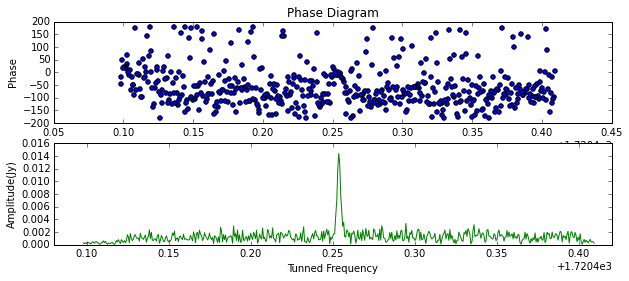

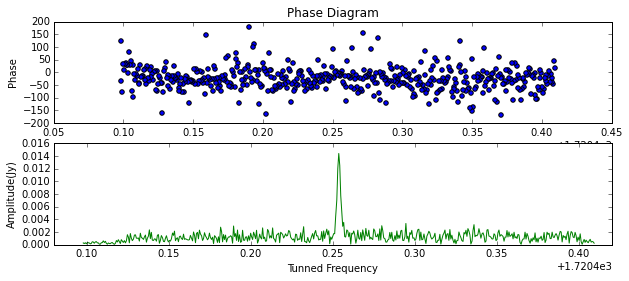

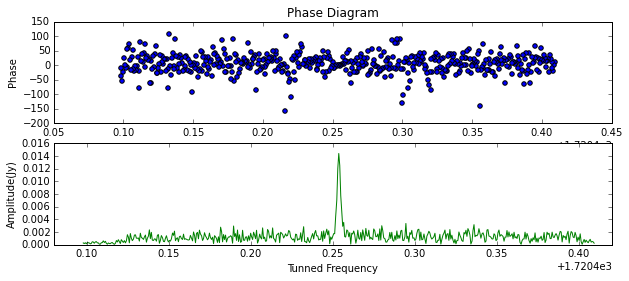

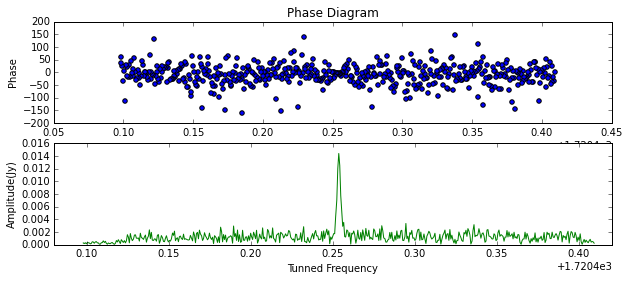

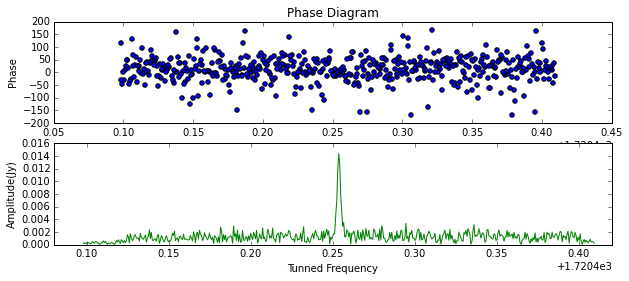

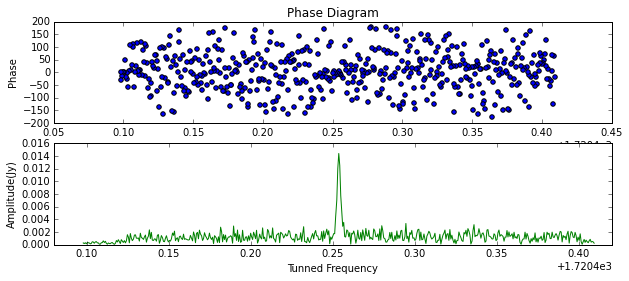

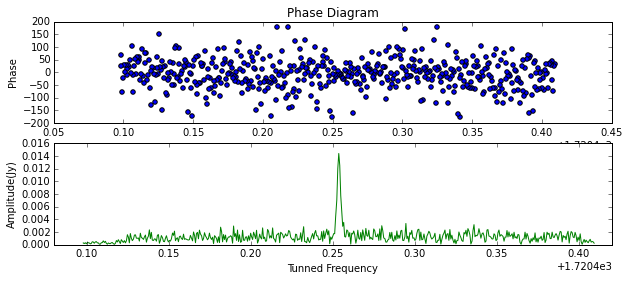

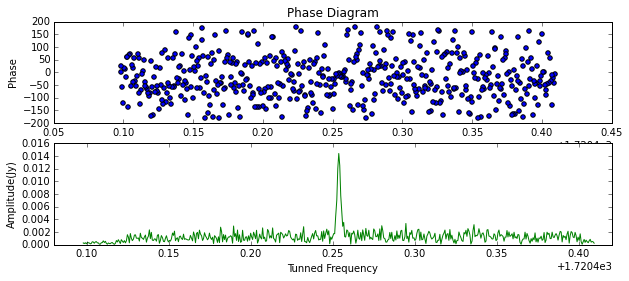

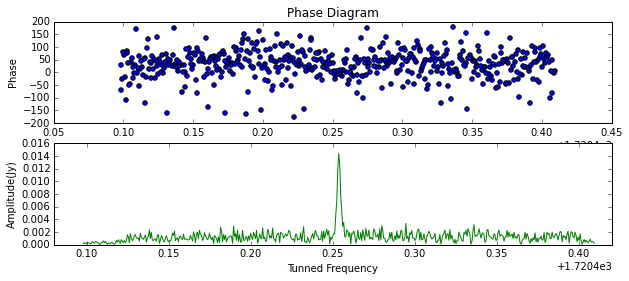

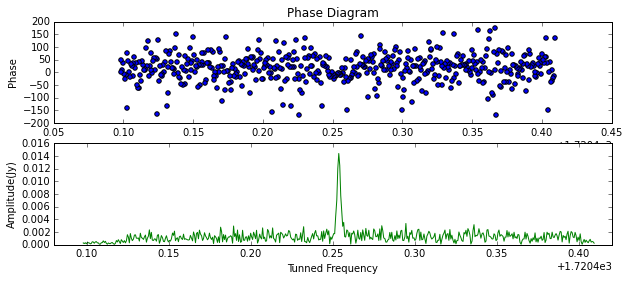

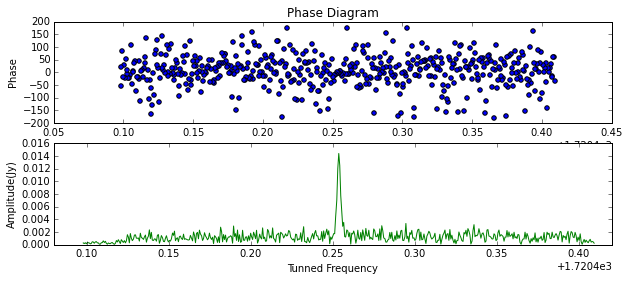

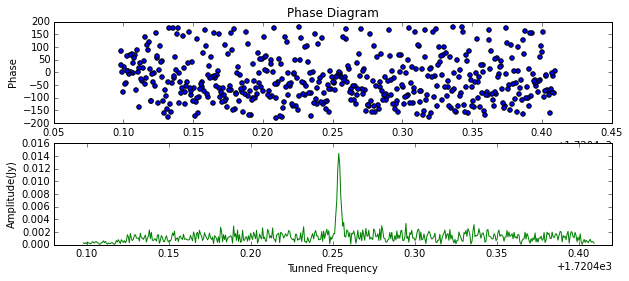

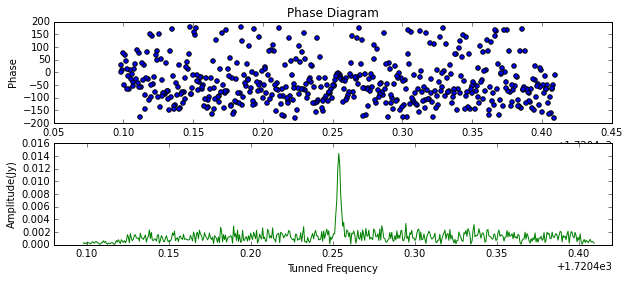

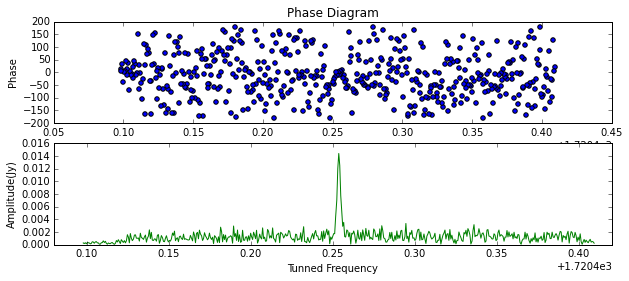

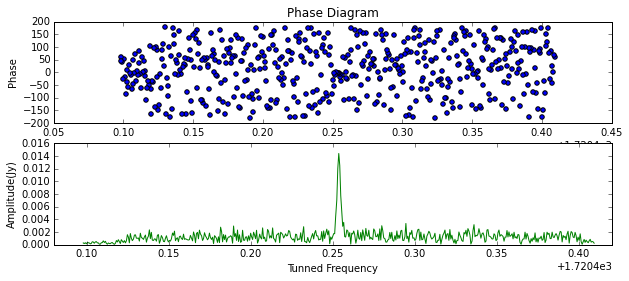

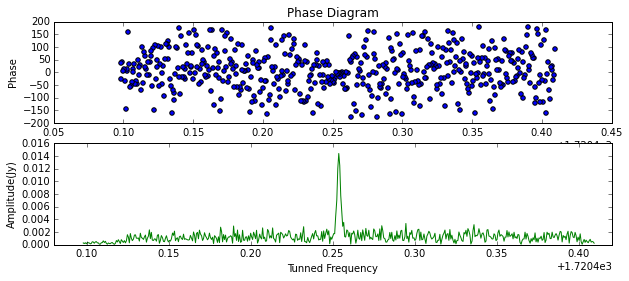

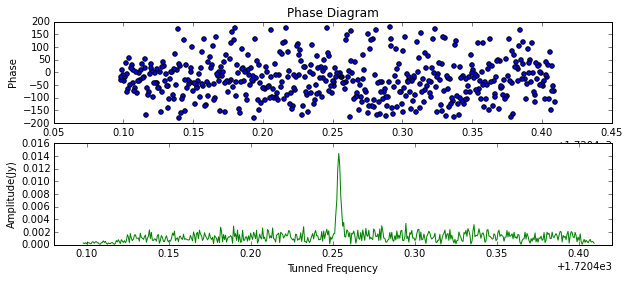

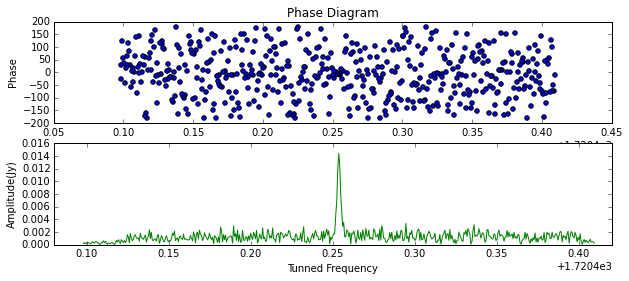

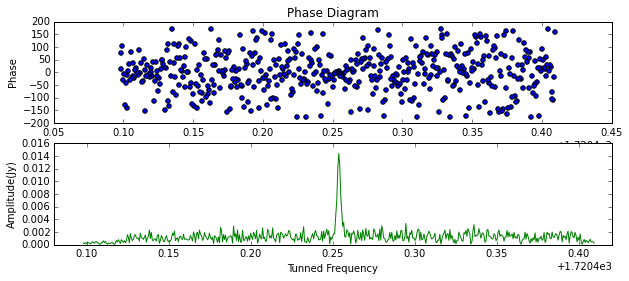

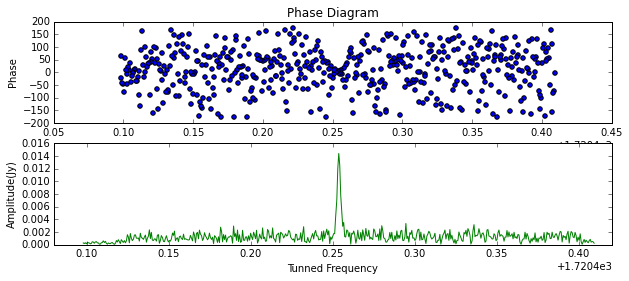

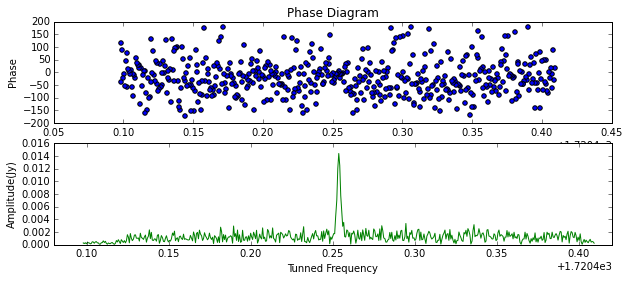

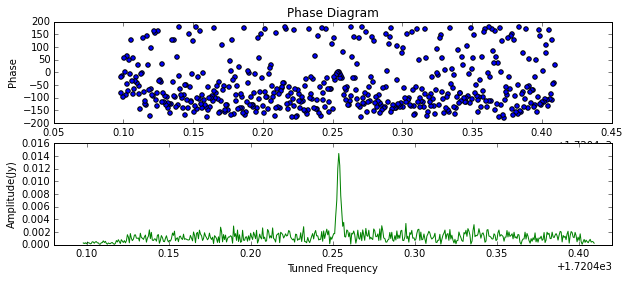

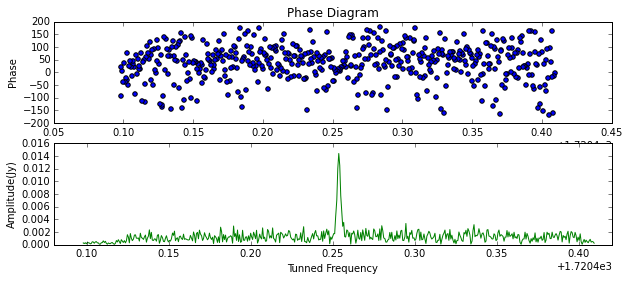

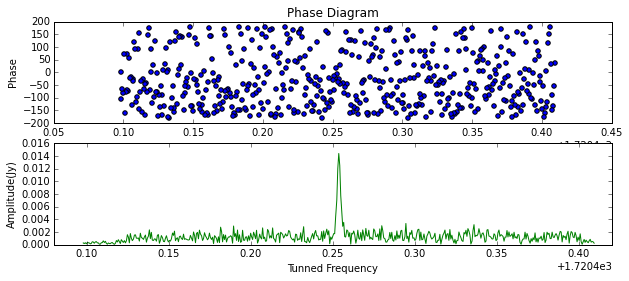

In [91]:
#Make plots for all observation times by including it in loop

#While loop to load data into a list by sepparating chunks by observation times

#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=table[0][1:]['Amplitude'].astype(float)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
    #Plot Channel vs. phase/ampl. for all times
    #use multi-pannel plots stacked on eachother
    plt.figure(figsize=(10,4))

    #subplot 1-phase
    plt.subplot (2,1,1)
    #need to limit input to each chunk of data
    plt.scatter(dataframe.Frequency, dataframe.Phase)
    #I don't want it to show the x-axis?
    plt.ylabel('Phase')
    plt.title('Phase Diagram')


    #subplot 2-ampl.
    plt.subplot (2,1,2)
    plt.plot(dataframe.Frequency, dataframe.Amplitude, color='g')
    #how do I get the scale to be numbers like 1720....
    plt.xlim(1720.48, 1720.82)

    plt.xlabel('Tunned Frequency')
    plt.ylabel('Amplitude(Jy)')

    plt.savefig('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Phase_Diagrams.pdf')
    plt.show()
    
    #shifts the header row to the next table in the data
    header_row += 523

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


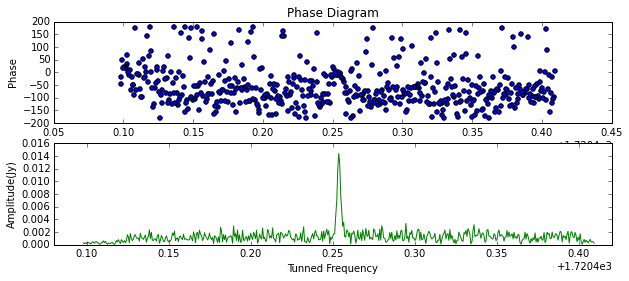

In [92]:
#Single table[0] plot
#use multi-pannel plots stacked on eachother

plt.figure(figsize=(10,4))

#subplot 1-phase
plt.subplot (2,1,1)
#need to limit input to each chunk of data
plt.scatter(table[0].Frequency, table[0].Phase)
#I don't want it to show the x-axis?
plt.ylabel('Phase')
plt.title('Phase Diagram')


#subplot 2-ampl.
plt.subplot (2,1,2)
plt.plot(table[0].Frequency, table[0].Amplitude, color='g')
#how do I get the scale to be numbers like 1720....
plt.xlim(1720.48, 1720.82)

plt.xlabel('Tunned Frequency')
plt.ylabel('Amplitude(Jy)')

plt.savefig('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Phase_Diagram0.pdf')
plt.show()

#Get Signal Phase from Data

In [12]:
#Start with basic function to return ampl. values > threshold 
def signal_phase_range_1(data, column):
    '''Function that reads through amplitudes and returns amplitudes > constant threshold'''
    #signal is defined as pts over a threshold value
    #define threshold value (here I just assigned one but should be done by stats or something)
    threshold_ampl=0.010
    
    #Create list to hold signal aplitudes
    signal_ampl_list = []
    for values in column: 
        if values >= threshold_ampl:
            #type(values) 
            #print(type(values))
            signal_ampl_list.append(values)
    return signal_ampl_list         

In [13]:
#test function step 1 for small data
signal_phase_range_1(table[0], table[0].Amplitude)

[0.012504700000000001, 0.0144034, 0.012017699999999999]

In [14]:
#Assign array values from function to a table 
x = signal_phase_range_1(table[0], table[0].Amplitude)
sig_ampl=pd.DataFrame({'Amplitude':x})
sig_ampl

,Amplitude
0,0.012505
1,0.014403
2,0.012018


In [15]:
#merge data to get columns for detection ampl only
result= pd.merge(table[0], sig_ampl, on='Amplitude')
result

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,256,1,RR,1720.6543,0,0.012505,-12.071
1,257,1,RR,1720.6537,0,0.014403,-0.377
2,258,1,RR,1720.6531,0,0.012018,-10.621


In [16]:
#Average phase values
result['Phase'].mean()

-7.689666666666667

#find the fringe size for each observation period

In [17]:
#times from data found by reg.ex. but retyped here
detection_times= [0.616666667,1.133333333,1.65,2.166666667,2.683333333,3.2,3.716666667,5.266666667,5.783333333,6.3,6.816666667,7.333333333,7.85,8.366666667,8.883333333,9.4,9.916666667,11.46666667,11.98333333]

In [18]:
#put times into data table and saved them 
times=pd.DataFrame({'hour': detection_times})
#record_times.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Bin/project_obs_hrs.csv', delimiter=',')
times.head()

,hour
0,0.616667
1,1.133333
2,1.650000
3,2.166667
4,2.683333


In [19]:
observed_disctance=[69.11930321,125.719833,180.0236871,231.0388316,277.8333112,319.552275,355.4335921,422.0996889,429.3084183,428.6744535,420.2093758,404.0678269,380.5446841,350.0696729,313.199517,270.6077682,223.072501,59.84443341,1.876222992]

In [20]:
distance=pd.DataFrame({'Obsv_Dist':observed_disctance})
distance.head()


,Obsv_Dist
0,69.119303
1,125.719833
2,180.023687
3,231.038832
4,277.833311


In [43]:
#records=pd.merge(times, distance, index=True, how='outer')
records=pd.DataFrame({'Distance_obsv':distance.Obsv_Dist, 'Time_obsv':times.hour,})
records.head()

,Distance_obsv,Time_obsv
0,69.119303,0.616667
1,125.719833,1.133333
2,180.023687,1.650000
3,231.038832,2.166667
4,277.833311,2.683333
